# Project: An Analysis to Investigate Why Patients Do Not Show Up For Their Appointments In Brasil 

> In this project, we want to investigate the reason(s) why patients do not show up for their medical appointments in Brasil.

## Table of Contents
This project will be briefly discussed under the following sections. 
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This project attempts to investigate why patients do not show up for their medical appointments in Brasil. Many factors were taken into consideration to understand the possible factor or combination of factors that could encourage this behaviour. A thorough understanding of this will help us to predict whether a patient will turn up for their appointment or not. It could also help us become proactive to take steps in ensuring that patients actually turn up for their appointments.

### Dataset Description 

Factors taken into consideration are seen in the columns of the dataset. A peek into the columns in the dataset according to this [kaggle page](https://www.kaggle.com/datasets/joniarroba/noshowappointments) gives us the following descriptions of the columns in the dataset:

1. PatientID: A unique ID given to every patient.
2. AppointmentID: This is also a unique ID for each appointment that is booked by a patient.
3. Gender: The gender of the patient, whether male or female.
4. ScheduleDay: The day the appointment was booked.
5. AppointmentDay: The actual day the said appointment is to hold.
6. Age: The age of the patient.
7. Neighbourhood: The location where the appointment takes place.
8. Scholarship: True or false. This attribute checks whether or not the patient is enrolled in the government's welfare program Bolsa Familia
9. Hypertension: If patient is hypertensive
10. Diabetes: If patient is diabetic
11. Handicap: If patient is handicaped.
12. Alcoholic: If patient is alcoholic
13. SMS_received: whether or not the patient received a message reminding them of the appointment
14. No-show: No or Yes - No, if the patient showed up, yes, if they did not show up.


### Question(s) for Analysis
To provide some direction and guidance for the analysis, I want to pose the following questions:
1. Are men more likely to honour their appointments than women?
2. What effect does a patient's age have to do with whether they honoured their appointments or not?
3. Does reminding a patient of their appointment via SMS increase their chances of keeping their appointments? 

In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### Load in the Dataset Provided

In [129]:
dataset = pd.read_csv('Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv')
dataset.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [130]:
dataset.shape

(110527, 14)

The dataset has record for 110527 mediacl appointments with 14 columns.

In [131]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


With the ecxeption of Gender, ScheduleDay, AppointmentDay, Neighbourhood and No-show, all the other columns are of type int64. PatientID is of type float64. In summary, 8 columns are of integer types, 5 object types and only 1 column is of type float.

In [132]:
dataset.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

We have a really clean dataset. There are no missing values in the dataset. However, it is very necessary for us to streamline our dataset such that it houses only the columns relevant to our analysis. For example, the PatientID and the AppointmentID column are not relevant to our analysis, hence, we want to drop them. In addition, the ScheduleDay and AppointmentDay columns are of type object, we want to convert them to Pandas datetime objects. Finally, I will add a new column to the dataframe for the difference in days betweed ScheduledDay and AppointmentDay. This gives us an idea of how long a patient has to wait to see the doctor.

I perform those activities below:

In [133]:
dataset.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [134]:
# We first convert the ScheduledDay and AppointmentDay objects to datetime, then strip the results of the timezone parts. 
# This results in a string object which we convert back to datetime object. We do this so that we can find the differnce 
# between the ScheduledDay and AppointmentDay, which helps us know jow long a patient had to wait to see the doctor 

dataset['ScheduledDay'] = pd.to_datetime(dataset['ScheduledDay'], errors='coerce').dt.strftime('%Y-%m-%d')
# Convert back to datetime object
dataset['ScheduledDay'] = pd.to_datetime(dataset['ScheduledDay'])

dataset['AppointmentDay'] = pd.to_datetime(dataset['AppointmentDay'], errors='coerce').dt.strftime('%Y-%m-%d')
# Convert back to datetime object
dataset['AppointmentDay'] = pd.to_datetime(dataset['AppointmentDay'])

# Find the difference in days between ScheduledDay and AppointmentDay
dataset['Day_difference'] = (dataset['AppointmentDay'] - dataset['ScheduledDay']).dt.days

# View top of data
dataset.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Day_difference
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0


I will not have a need to use the ScheduledDay and AppointmentDay columns again, I have already done so my purposes in this analysis. I will go ahead to drop those columns to avoid code repition in calling the drop function multiple times. I will define a function to automate this task just in case I need to drop multiple columns in other places in this analysis

In [135]:
def drop_columns(col_names): 
    '''A custom function that drops unnecessary columns at once'''
    for col in col_names:
        dataset.drop(col, inplace=True, axis=1)

In [136]:
# Use Custom Function drop_columns to Drop ScheduleDay and AppointmentDay columns
drop_columns(['ScheduledDay', 'AppointmentDay'])
dataset.head()

,PatientId,AppointmentID,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Day_difference
0,2.987250e+13,5642903,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0
1,5.589978e+14,5642503,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0
2,4.262962e+12,5642549,F,62,MATA DA PRAIA,0,0,0,0,0,0,No,0
3,8.679512e+11,5642828,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0
4,8.841186e+12,5642494,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0


In [137]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 13 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
Day_difference    110527 non-null int64
dtypes: float64(1), int64(9), object(3)
memory usage: 11.0+ MB


In [138]:
dataset['Day_difference'].unique()

array([  0,   2,   3,   1,   4,   9,  29,  10,  23,  11,  18,  17,  14,
        28,  24,  21,  15,  16,  22,  43,  30,  31,  42,  32,  56,  45,
        46,  39,  37,  38,  44,  50,  60,  52,  53,  65,  67,  91,  66,
        84,  78,  87, 115, 109,  63,  70,  72,  57,  58,  51,  59,  41,
        49,  73,  64,  20,  33,  34,   6,  35,  36,  12,  13,  40,  47,
         8,   5,   7,  25,  26,  48,  27,  19,  61,  55,  62, 176,  54,
        77,  69,  83,  76,  89,  81, 103,  79,  68,  75,  85, 112,  -1,
        80,  86,  98,  94, 142, 155, 162, 169, 104, 133, 125,  96,  88,
        90, 151, 126, 127, 111, 119,  74,  71,  82, 108, 110, 102, 122,
       101, 105,  92,  97,  93, 107,  95,  -6, 139, 132, 179, 117, 146, 123])

If you carefully observe the result above, you will discover that there were days where the 'Day_difference' column were negative. I will drop these rows

In [139]:
index_names = dataset[(dataset['Day_difference'] < 0)].index
dataset.drop(index_names, inplace=True)
dataset.shape

(110522, 13)

In [140]:
dataset['Day_difference'].unique()

array([  0,   2,   3,   1,   4,   9,  29,  10,  23,  11,  18,  17,  14,
        28,  24,  21,  15,  16,  22,  43,  30,  31,  42,  32,  56,  45,
        46,  39,  37,  38,  44,  50,  60,  52,  53,  65,  67,  91,  66,
        84,  78,  87, 115, 109,  63,  70,  72,  57,  58,  51,  59,  41,
        49,  73,  64,  20,  33,  34,   6,  35,  36,  12,  13,  40,  47,
         8,   5,   7,  25,  26,  48,  27,  19,  61,  55,  62, 176,  54,
        77,  69,  83,  76,  89,  81, 103,  79,  68,  75,  85, 112,  80,
        86,  98,  94, 142, 155, 162, 169, 104, 133, 125,  96,  88,  90,
       151, 126, 127, 111, 119,  74,  71,  82, 108, 110, 102, 122, 101,
       105,  92,  97,  93, 107,  95, 139, 132, 179, 117, 146, 123])

The PatientID and the AppointmentID columns are also not relevant to this analysis, I will go ahead to drop them using the custom function defined earlier

In [141]:
drop_columns(['PatientId', 'AppointmentID'])
dataset.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Day_difference
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No,0
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0


## Ascertaining the Correctness of the Values in the Dataset

In [142]:
dataset['Gender'].value_counts()

F    71837
M    38685
Name: Gender, dtype: int64

We can see clearly that the Gender column contains the correct values. Males and Females

In [143]:
dataset['Age'].min(), dataset['Age'].max()

(-1, 115)

For the Age column, I did not check for the unique values nor the number of values in each unique categories. This is because there is a wide variety of unique values that are possible. However, on checking the minimum and maximum values, we can see that there are some strange values in the dataset. I will proceed to remove the rows with age less than 0 and greater than 100.

In [144]:
index_names = dataset[(dataset['Age'] < 0) | (dataset['Age'] > 100)].index
dataset.drop(index_names, inplace=True)
dataset['Age'].min(), dataset['Age'].max()

(0, 100)

Now, our dataset have only rows with the correct age values

In [145]:
dataset['Neighbourhood'].unique()

array(['JARDIM DA PENHA', 'MATA DA PRAIA', 'PONTAL DE CAMBURI',
       'REPÚBLICA', 'GOIABEIRAS', 'ANDORINHAS', 'CONQUISTA',
       'NOVA PALESTINA', 'DA PENHA', 'TABUAZEIRO', 'BENTO FERREIRA',
       'SÃO PEDRO', 'SANTA MARTHA', 'SÃO CRISTÓVÃO', 'MARUÍPE',
       'GRANDE VITÓRIA', 'SÃO BENEDITO', 'ILHA DAS CAIEIRAS',
       'SANTO ANDRÉ', 'SOLON BORGES', 'BONFIM', 'JARDIM CAMBURI',
       'MARIA ORTIZ', 'JABOUR', 'ANTÔNIO HONÓRIO', 'RESISTÊNCIA',
       'ILHA DE SANTA MARIA', 'JUCUTUQUARA', 'MONTE BELO',
       'MÁRIO CYPRESTE', 'SANTO ANTÔNIO', 'BELA VISTA', 'PRAIA DO SUÁ',
       'SANTA HELENA', 'ITARARÉ', 'INHANGUETÁ', 'UNIVERSITÁRIO',
       'SÃO JOSÉ', 'REDENÇÃO', 'SANTA CLARA', 'CENTRO', 'PARQUE MOSCOSO',
       'DO MOSCOSO', 'SANTOS DUMONT', 'CARATOÍRA', 'ARIOVALDO FAVALESSA',
       'ILHA DO FRADE', 'GURIGICA', 'JOANA D´ARC', 'CONSOLAÇÃO',
       'PRAIA DO CANTO', 'BOA VISTA', 'MORADA DE CAMBURI', 'SANTA LUÍZA',
       'SANTA LÚCIA', 'BARRO VERMELHO', 'ESTRELINHA', 'FORTE SÃO 

In [146]:
dataset['Neighbourhood'].value_counts()

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5804
RESISTÊNCIA                    4430
JARDIM DA PENHA                3877
ITARARÉ                        3514
CENTRO                         3334
SANTA MARTHA                   3131
TABUAZEIRO                     3131
JESUS DE NAZARETH              2853
BONFIM                         2773
SANTO ANTÔNIO                  2744
SANTO ANDRÉ                    2571
CARATOÍRA                      2565
JABOUR                         2509
SÃO PEDRO                      2448
ILHA DO PRÍNCIPE               2266
NOVA PALESTINA                 2264
ANDORINHAS                     2258
DA PENHA                       2217
ROMÃO                          2214
GURIGICA                       2018
SÃO JOSÉ                       1976
BELA VISTA                     1907
MARUÍPE                        1902
FORTE SÃO JOÃO                 1889
ILHA DE SANTA MARIA            1885
SÃO CRISTÓVÃO                  1836
REDENÇÃO                    

In [147]:
dataset['Scholarship'].value_counts()

0    99653
1    10861
Name: Scholarship, dtype: int64

In [148]:
dataset['Hipertension'].value_counts()

0    88714
1    21800
Name: Hipertension, dtype: int64

In [149]:
dataset['Diabetes'].value_counts()

0    102571
1      7943
Name: Diabetes, dtype: int64

In [150]:
dataset['Alcoholism'].value_counts()

0    107154
1      3360
Name: Alcoholism, dtype: int64

In [151]:
dataset['Handcap'].value_counts()

0    108279
1      2036
2       183
3        13
4         3
Name: Handcap, dtype: int64

In [152]:
dataset['SMS_received'].value_counts()

0    75033
1    35481
Name: SMS_received, dtype: int64

In [153]:
dataset['No-show'].value_counts()

No     88203
Yes    22311
Name: No-show, dtype: int64

We can clearly see from the checks carried out on the dataset above that every column has the required values with the exception of the 'Handcap' column which has values ranging from 0 to 4. The kaggle webpage that was referred to explicitly stated that that particular column was supposed to contain True/False values. I will ignore that column.

However, before I proceed to the EDA, I will like to rename the columns to all lowercase partly due to the spelling errors and as a matter of preference.

In [154]:
dataset.columns = ['gender', 'age', 'neighborhood', 'scholarship', 'hypertension', 'diabetes', 'alcoholism', 'handicap',
                  'sms_received', 'no_show', 'day_difference']
dataset.head()

,gender,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,day_difference
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No,0
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0


In [155]:
dataset.describe()

,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,day_difference
count,110514.000000,110514.000000,110514.000000,110514.000000,110514.000000,110514.000000,110514.000000,110514.000000
mean,37.084686,0.098277,0.197260,0.071873,0.030403,0.022196,0.321054,10.184438
std,23.103024,0.297690,0.397932,0.258279,0.171695,0.161391,0.466884,15.255288
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,15.000000
max,100.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,179.000000


Running a little summary statistics on the cleaned dataset is good at this moment so that we can get a basic understanding of the data before carrying out the Exploratory Data Analysis.

We can observe that the median age is 37. 25% of the patients are less than 18 years and 75% are above 55 years of age

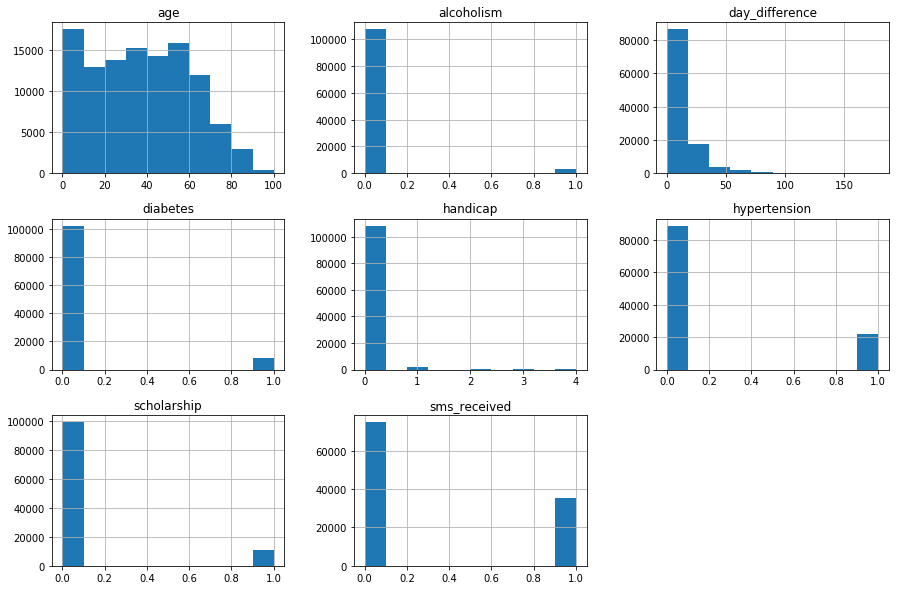

In [156]:
dataset.hist(figsize=(15,10));
plt.title('A Histogram Showing The Numerical Values in the Dataset');

From the histogram above, we can see that the age of the patients is slightly skewed to the right with the majority of the people aged 0 - 80 years. The majority of the patients are not alcoholics. Quite a number of the patients did not receive at least 1 sms while about 40,000 received.

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1: Are men more likely to honour their appointments than women

### Create a Mask to Make Getting rows Easy

In [157]:
# honor refers to those that honored their appointment and these are assigned 'no' in the no-show column
# dishonor refers to those who dishonoured their appointment and these are assigned 'yes' in the no-show column

honor = dataset.no_show == 'No'
dishonor = dataset.no_show == 'Yes'

In [158]:
dataset['no_show'].value_counts()

No     88203
Yes    22311
Name: no_show, dtype: int64

In [159]:
dataset['gender'].value_counts()

F    71829
M    38685
Name: gender, dtype: int64

In [160]:
age_dist = pd.cut(dataset['age'], bins=[-2, 14, 20, 30, 70, 120], 
                  labels=['children', 'teens', 'youngster', 'adults', 'seniors'])
age_dist.value_counts()


dataset.groupby('no_show', as_index=False)['age'].mean()

,no_show,age
0,No,37.787297
1,Yes,34.307023


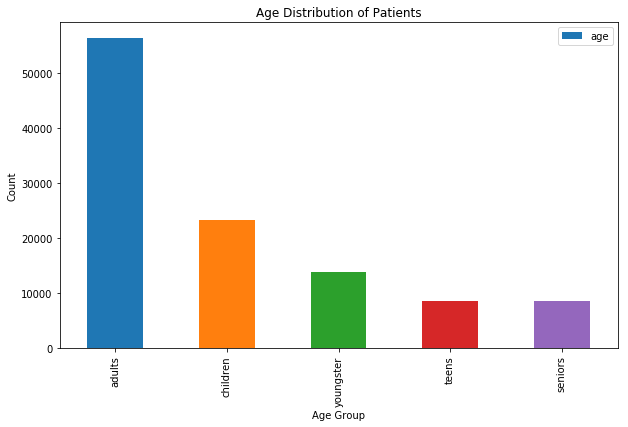

In [161]:
age_dist.value_counts().plot.bar(title='Age Distribution of Patients', figsize=(10, 6)).legend();
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

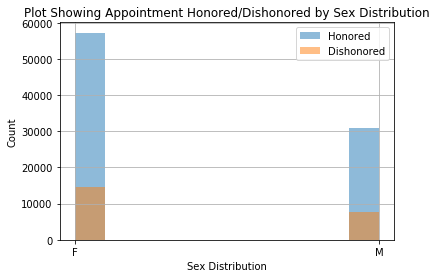

In [162]:
dataset.gender[honor].hist(alpha=0.5, label='Honored')
dataset.gender[dishonor].hist(alpha=0.5, label='Dishonored')
plt.title('Plot Showing Appointment Honored/Dishonored by Sex Distribution')
plt.xlabel('Sex Distribution')
plt.ylabel('Count')
plt.legend();
plt.show()

The result doesn't seem to show much correlation between gender and whether or not a person is more likely to honor an appointment or not.

### Research Question 2:  What effect does a patient's age have to do with whether they honoured their appointments or not?

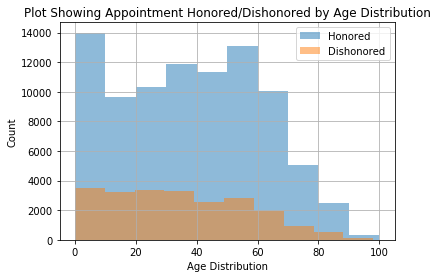

In [163]:
dataset.age[honor].hist(alpha=0.5, bins=10, label='Honored')
dataset.age[dishonor].hist(alpha=0.5, bins=10, label='Dishonored')
plt.title('Plot Showing Appointment Honored/Dishonored by Age Distribution')
plt.xlabel('Age Distribution')
plt.ylabel('Count')
plt.legend();
plt.show()

From the histogram, we can see that patients aged 0 - 10 seems to honor their appointments more than other age groups. This could be largely because they are children and very vulnerable. 

### Research Question 3: Does reminding a patient of their appointment via SMS increase their chances of keeping their appointments

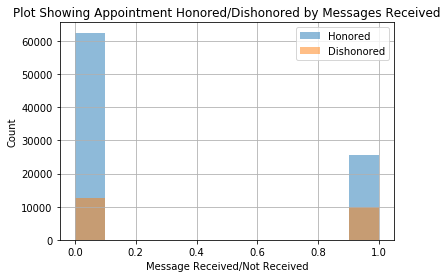

In [164]:
dataset.sms_received[honor].hist(alpha=0.5, bins=10, label='Honored')
dataset.sms_received[dishonor].hist(alpha=0.5, bins=10, label='Dishonored')
plt.title('Plot Showing Appointment Honored/Dishonored by Messages Received')
plt.xlabel('Message Received/Not Received')
plt.ylabel('Count')
plt.legend();
plt.show()

<a id='conclusions'></a>
## Conclusions

From the findings in our analysis, I come to discover that although more women honor their appointment, this could be due to the fact that they are more women in the dataset than men. There are also more adults aged 30 to 70 in the dataset

We also discover that chilrdren tend to honor appointments. Again, this could be due to the fact that their parents are responsible for ensuring they keep the appointment, and because they are vulnerable, chances are that they are likely to show up for the appointments.

Whether or not patients received SMS doesn't show more correlation with keeping appointments as seen in our histogram

## Limitation

There was no detailed info on the data collection process. From videos that I saw online, Data Analysis requires that the data collection process be carefully documented as they guide the analysis.

In [165]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0